# Introduction to Machine Learning

**Author:** Elen Tesfai  
**GitHub Repository:** [Elen's GitHub Link](https://github.com/Elen-tesfai/datafun-07-ml)


# Import Libraries
In this section, we will import the necessary libraries for data analysis and visualization.

In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Load the Iris dataset into DataFrame
df = sns.load_dataset('iris')

# Inspect first rows of the DataFrame
print(df.head())

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


# Part 1 - Chart a Straight Line
## Celsius vs Fahrenheit Data
This section shows the relationship between Celsius and Fahrenheit using the equation:

\[ F = \frac{9}{5}C + 32 \]

Where:
- \( m = \frac{9}{5} \) is the slope (rise over run).
- \( b = 32 \) is the y-intercept (the point where the line crosses the y-axis).

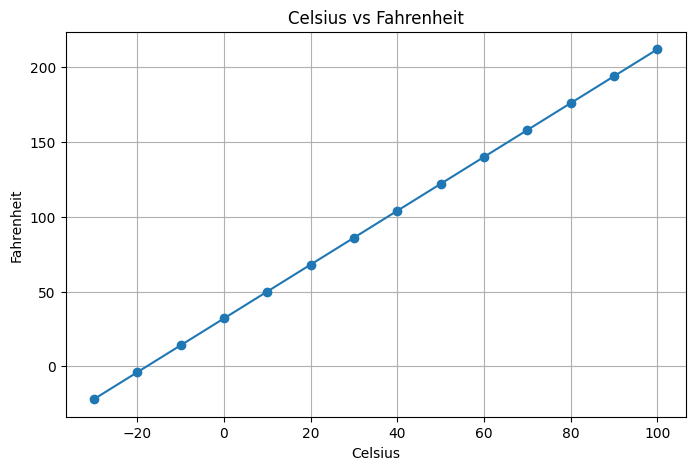

In [8]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

# Define Celsius values (you can adjust the range)
celsius = pd.Series(range(-30, 101, 10))  # From -30 to 100 in steps of 10

# Calculate Fahrenheit using the equation F = (9/5)*C + 32
fahrenheit = (9/5) * celsius + 32

# Create a DataFrame for easy plotting
temp_df = pd.DataFrame({
    'Celsius': celsius,
    'Fahrenheit': fahrenheit
})

# Plot the Celsius vs Fahrenheit
plt.figure(figsize=(8, 5))
plt.plot(temp_df['Celsius'], temp_df['Fahrenheit'], marker='o')

# Set labels and title
plt.title('Celsius vs Fahrenheit')
plt.xlabel('Celsius')
plt.ylabel('Fahrenheit')

# Show the plot
plt.grid(True)
plt.show()